<div style="text-align: left;"><img src="https://i.imgur.com/BC2sAdw.png" align="left" width="200" title="Universiteit Leiden"/ ></div>

<font color='#0C2577'><b>Improving the age at onset estimation for Huntington’s Disease using Machine Learning models on top of the Enroll-HD data</b></font>

<left><font color='#0C2577'>JC Marchiori Dias – BioInformatics Master Thesis 2023/2024 - Notebook 3</font></left> 

<left><font color='#0C2577'>Leiden University - LUMC BioSemantics Group</font></left>

#### Import Libraries

In [1]:
## Importing Relevant Python Libraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import methods.HD_AAO_Estim_Improv_Methods as aao


#### Options for the notebook

In [2]:
## Set options for pandas
# to have better/more output from lists/dataframes

pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)

In [28]:
# plt.rcParams['figure.dpi'] = 600
# plt.rcParams['savefig.dpi'] = 600

#### Group Features Definition

In [4]:
## Grouping of different features provided by Enroll-HD

patient_features =  ['caghigh', 'caglow', 'parenthd_impFill', 'region_impFill', 'parentagesx_impFill', 'sex', 'race',
                     'handed_impFill', 'weight_filled_impFill', 'height_filled_impFill']

others = ['rtrddur_filled_impFill', 'age', 'cap_score', 'bmi_new_impFill', 'packy_impFill', 'hxpacky_impFill',
          'cUHDRS', 'alcab_filled_impFill', 'tobyos_impFill', 'tobcpd_impFill', 'patient_alive_impFill']

under_eval = ['tobab_filled_impFill']

lifestyle_features = ['isced_filled_impFill', 'maristat_filled_impFill', 'res_filled_impFill', 'jobclas_filled_impFill',
                      'emplnrsn_filled_impFill', 'nmdrg_filled_impFill', 'nmdrgfrq_filled_impFill', 'cafab_filled_impFill',
                      'cafpd_filled_impFill', 'hxalcab_filled_impFill', 'alcunits_filled_impFill', 'hxtobab_filled_impFill',
                      'hxtobcpd_impFill', 'hxtobyos_impFill']

assessm_features = ['pbashalsm_1', 'pbashalsm_2', 'pbashalsm_3', 'pbashalsm_4', 'pbashalsm_5', 'pbasaptsv_impFill',
'pbasdelfr_impFill', 'pbashalsv_impFill', 'pbashalfr_impFill', 'swrt_impFill', 'sbh7_impFill', 'scnt_impFill',
'pbasaptfr_impFill', 'ccvab_impFill', 'pbasirrsv_impFill', 'ccdep_impFill', 'ccpsy_impFill', 'cccog_impFill', 
'sit_impFill', 'carelevl_impFill', 'ccapt_impFill', 'sdmt_impFill', 'finances_impFill', 'pbasaggfr_impFill',
'pbasocsv_impFill', 'ccpob_impFill', 'occupatn_impFill', 'ccirb_impFill', 'adl_impFill', 'pbaspersv_impFill',
'pbasirrfr_impFill', 'pbasocfr_impFill', 'pbasperfr_impFill', 'emplusl_impFill', 'verflt_impFill', 'pbassidsv_impFill', 
'pbasdepfr_impFill', 'pbasaggsv_impFill', 'pbasdelsv_impFill', 'emplany_impFill', 'verfct_impFill', 'chores_impFill', 
'pbasdepsv_impFill', 'pbasanxfr_impFill', 'pbasanxsv_impFill', 'drive_impFill', 'fafinan_impFill', 'bed_impFill',
'pbassidfr_impFill', 'toilet_impFill', 'pbasdisbsv_impFill', 'bathe_impFill', 'sbh_filled_impFill', 
'housewrk_impFill', 'trnchair_impFill', 'supchild_impFill', 'volunt_impFill', 'laundry_impFill', 'grocery_impFill',
'dress_impFill', 'pbasdisbfr_impFill', 'pubtrans_impFill', 'walknbr_impFill', 'cash_impFill', 'prepmeal_impFill',
'comb_impFill', 'telephon_impFill', 'ownmeds_impFill', 'feedself_impFill', 'walkhelp_impFill', 'int1_filled_impFill',
'chorrle_impFill', 'sacvelh_impFill', 'chorlle_impFill', 'carehome_impFill', 'chorrue_impFill', 'chorlue_impFill', 
'dystlle_impFill', 'dystrle_impFill', 'sacvelv_impFill', 'hxsid_impFill', 'rdcwk_filled_impFill', 'sacinitv_impFill', 
'sacinith_impFill', 'walkfall_impFill', 'dystlue_impFill', 'prosupr_impFill', 'dystrue_impFill', 'ocularh_impFill',
'ocularv_impFill', 'prosupl_impFill', 'fingtapl_impFill', 'fingtapr_impFill', 'gait_impFill', 'rigarml_impFill', 
'dysarth_impFill', 'rigarmr_impFill', 'gen1_impFill', 'chorbol_impFill', 'brady_impFill', 'dysttrnk_impFill', 
'chorface_impFill', 'tandem_impFill', 'tongue_impFill', 'chortrnk_impFill', 'retropls_impFill', 'pbainfo_impFill',
'verfct5_impFill', 'indepscl_impFill', 'scnt1_impFill', 'sdmt1_impFill', 'luria_impFill', 'swrt1_impFill', 'sit1_impFill',
'sxmajor_sym_impFill', 'verflt05_impFill', 'verfct6_impFill', 'verflt07_impFill', 'verflt06_impFill', 'sit2_impFill',
'scnt3_impFill', 'sit3_impFill', 'sdmt2_impFill', 'scnt2_impFill', 'swrt3_impFill', 'swrt2_impFill', 'verfct7_impFill',
'ccmtr_impFill']

score_features = ['motscore_impFill', 'tfcscore_impFill', 'fascore_impFill', 'depscore_new_impFill', 
'irascore_new_impFill', 'psyscore_new_impFill', 'aptscore_new_impFill', 'exfscore_new_impFill']

onset_features = ['ccmtrage', 'sxsubj', 'sxfam', 'hddiagn', 'sxrater', 'sxgs', 'sxgsdy', 'ccdepage', 'ccirbage', 'ccvabage', 
'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']

study_features = ['patient_num', 'subjid', 'studyid', 'year_seq', 'visdy', 'hdcat_0', 'hdcat_l', 'hdcat_impFill', 
'evtnum_filled', 'diagconf_impFill']

reduced_features = ['age', 'caghigh', 'parentagesx_impFill', 'nmdrgfrq_filled_impFill', 'maristat_filled_impFill',
                    'emplnrsn_filled_impFill', 'alcunits_filled_impFill']

In [5]:
## Variable categorization of different features provided by Enroll-HD

bool_cols = ["alcab_filled", "bathe", "bed", "cafab_filled", "cafpd_filled", "carehome", "cash", "ccapt", "cccog", "ccdep", "ccirb",
                 "ccmtr", "ccpob", "ccpsy", "ccvab", "comb", "dress", "drive", "emplany", "emplusl", "fafinan", "feedself", "gen1",
                 "grocery", "housewrk", "hxalcab_filled", "hxsid", "hxtobab_filled", "laundry", "nmdrg_filled", "ownmeds", "parenthd",
                 "patient_alive", "pbashalsm_1", "pbashalsm_2", "pbashalsm_3", "pbashalsm_4", "pbashalsm_5", "prepmeal", "pubtrans",
                 "rdcwk_filled", "sbh_filled", "sbh7", "scnt", "sdmt", "sit", "supchild", "swrt", "telephon", "tobab_filled", "toilet",
                 "trl", "trnchair", "verfct", "verflt", "volunt", "walkfall", "walkhelp", "walknbr"]  # 59 Boolean columns

catg_cols = ["handed", "res_filled", "jobclas_filled", "maristat_filled", "race", "pbainfo", "emplnrsn_filled", "sxmajor_sym",
                 "hdcat", "hdcat_0", "hdcat_l", "region", "sex", "studyid"]  # 14 Categorical columns

ordn_cols = ["adl", "brady", "carelevl", "chorbol", "chores", "chorface", "chorlle", "chorlue", "chorrle", "chorrue",
                 "chortrnk", "diagconf", "dysarth", "dystlle", "dystlue", "dystrle", "dystrue", "dysttrnk", "finances", "fingtapl",
                 "fingtapr", "gait", "indepscl", "int1_filled", "isced_filled", "luria", "nmdrgfrq_filled", "occupatn", "ocularh", "ocularv", "pbasaggfr",
                 "pbasaggsv", "pbasanxfr", "pbasanxsv", "pbasaptfr", "pbasaptsv", "pbasdelfr", "pbasdelsv", "pbasdepfr", "pbasdepsv",
                 "pbasdisbfr", "pbasdisbsv", "pbashalfr", "pbashalsv", "pbasirrfr", "pbasirrsv", "pbasocfr", "pbasocsv", "pbasperfr",
                 "pbaspersv", "pbassidfr", "pbassidsv", "prosupl", "prosupr", "retropls", "rigarml", "rigarmr", "sacinith", "sacinitv",
                 "sacvelh", "sacvelv", "year_seq", "tandem", "tongue"]  # 64 Categorical Ordinal columns // 'seq' is changed to the new version: 'year_seq'

numr_cols = ["age", "alcunits_filled", "aptscore_new", "bmi_new", "caghigh", "caglow",  "ccaptage", "cccogage", "ccdepage",
                 "ccirbage", "ccmtrage", "ccpobage", "ccpsyage", "ccvabage", "depscore_new", "evtnum_filled", "exfscore_new", "fascore",
                 "fiscore", "height_filled", "hxpacky", "hxtobcpd", "hxtobyos", "irascore_new", "miscore", "motscore", "packy",
                 "parentagesx", "psyscore_new", "rtrddur_filled", "scnt1", "scnt2", "scnt3", "sdmt1", "sdmt2", "sit1", "sit2", "sit3",
                 "swrt1", "swrt2", "swrt3", "tfcscore", "tobcpd", "tobyos", "trla1", "trla2", "trla3", "trlb1", "trlb2", "trlb3",
                 "verfct5", "verfct6", "verfct7", "verflt05", "verflt06", "verflt07", "visdy", "weight_filled"]  # 58 Numeric columns

intg_cols = ["age", "aptscore_new", "caghigh", "caglow", "ccaptage", "cccogage", "ccdepage", "ccirbage", "ccmtrage", "ccpobage",
                 "ccpsyage", "ccvabage", "depscore_new", "evtnum_filled", "exfscore_new", "fascore", "fiscore", "hxtobcpd", "hxtobyos", "irascore_new",
                 "miscore", "motscore", "parentagesx", "psyscore_new", "rtrddur_filled", "scnt1", "scnt2", "scnt3", "sdmt1", "sdmt2", "sit1", "sit2", "sit3",
                 "swrt1", "swrt2", "swrt3", "tfcscore", "tobcpd", "tobyos", "trla1", "trla2", "trla3", "trlb1", "trlb2", "trlb3", "verfct5", "verfct6",
                 "verfct7", "verflt05", "verflt06", "verflt07", "visdy"]  # 52 integer columns --> subset of numeric columns



#### Loading Dataset

In [6]:
## Import of pre-processed and imputed data, created by LUMC BioSemantics Group
# Enroll-HD dataset is available after the associated Consortium evaluation and approval, therefore this data cannot be 
# found elsewhere and its location here is private. 

hd_imputed_df = pd.read_csv("~/Study/HD/my_project/hd_workflow_data/data_output/aao_feature_all/imputed_dfs/New_All_cases.csv", index_col="patient_num")

#### Filtering Data

In [7]:
## Patients considered genetic carrier

feat_model_df = hd_imputed_df[(hd_imputed_df['caghigh'] >= 35)]

In [8]:
## Only manifested patients that were enrolled as pre-manifested

feat_model_df = feat_model_df[(feat_model_df['hdcat_l'] == 3.0) & 
                              (feat_model_df['hdcat_0'] == 2.0) &
                              (feat_model_df['hdcat_impFill'] == 3.0)]

feat_model_df['hddiagn'].fillna(feat_model_df['ccmtrage'], inplace=True)
feat_model_df['hddiagn'].fillna(feat_model_df['sxrater'], inplace=True)
feat_model_df['hddiagn'].fillna(feat_model_df['sxfam'], inplace=True)
feat_model_df['hddiagn'].fillna(feat_model_df['sxsubj'], inplace=True)

In [9]:
## Create Study Dataset (from PostProcessed training Stage1 file)
## Target: hddiagn

target_pp = ['hddiagn']
columns_pp = patient_features + lifestyle_features

feat_model_df = feat_model_df.groupby('subjid').first()[target_pp + columns_pp]
feat_model_df = feat_model_df.reset_index()
feat_model_df.dropna(subset = ['hddiagn'], inplace=True)
feat_model_df

,subjid,hddiagn,caghigh,caglow,parenthd_impFill,region_impFill,parentagesx_impFill,sex,race,handed_impFill,weight_filled_impFill,height_filled_impFill,isced_filled_impFill,maristat_filled_impFill,res_filled_impFill,jobclas_filled_impFill,emplnrsn_filled_impFill,nmdrg_filled_impFill,nmdrgfrq_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill
0,1347826,68.0,41,15,1.0,3,59.0,1,0.0,0.0,68.0,167.0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2593663,53.0,42,20,1.0,3,60.0,0,0.0,0.0,80.0,178.0,4.0,2.0,3.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5033118,57.0,43,23,1.0,3,43.0,0,0.0,0.0,73.0,183.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,8.0,0.0,0.0,0.0
3,5796487,49.0,42,18,1.0,3,65.0,0,0.0,0.0,68.0,170.0,1.0,3.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,18.0,20.0
4,5895058,45.0,45,25,1.0,1,50.0,0,0.0,0.0,79.4,170.0,5.0,3.0,3.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,988755452,43.0,41,19,1.0,3,54.0,0,0.0,0.0,75.0,180.0,3.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
885,995587389,39.0,48,18,1.0,1,32.0,0,0.0,0.0,69.9,177.8,3.0,0.0,2.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,21.0
886,996268693,43.0,46,22,1.0,3,55.0,0,0.0,0.0,71.1,180.0,5.0,2.0,2.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,25.0,1.0,12.0,16.0
887,996629325,53.0,42,17,1.0,3,60.0,0,0.0,0.0,75.5,182.0,5.0,2.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,16.0,0.0,0.0,0.0


#### Determining the final Feature Set

In [10]:
# Parameters

ml_runs = 400
cag_min = 40
cag_max = 61
runOneHotEnc = 1
target = 'hddiagn'
empty_df = pd.DataFrame()

# Selections

selection_1 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
              'region_impFill']

selection_2 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
              'region_impFill', 'nmdrgfrq_filled_impFill']

selection_3 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
              'region_impFill', 'hxtobab_filled_impFill']

selection_4 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
              'region_impFill', 'hxtobab_filled_impFill', 'nmdrgfrq_filled_impFill']

# ---------------------------------------------------
# Selection 1

num_columns_pp = []
cat_columns_pp = []

for i in selection_1:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)            

cols_fs1 = [num_columns_pp, cat_columns_pp]
NNparams = [100, 10, 2]      

cb_fs1, nn_fs1, cb_res_fs1, nn_res_fs1, _, _, _, _, _, _ = aao.tryTwoModels(feat_model_df, ml_runs, cols_fs1, target, cag_min, cag_max, NNparams, runOneHotEnc, empty_df)

print("\nFeature Selection 1")
print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", nn_fs1)
print("\nCatBoost mean results after", ml_runs, "runs:\n", cb_fs1)

# ---------------------------------------------------
# Selection 2

num_columns_pp = []
cat_columns_pp = []

for i in selection_2:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)            

cols_fs2 = [num_columns_pp, cat_columns_pp]
NNparams = [100, 10, 2]      

cb_fs2, nn_fs2, cb_res_fs2, nn_res_fs2, _, _, _, _, _, _ = aao.tryTwoModels(feat_model_df, ml_runs, cols_fs2, target, cag_min, cag_max, NNparams, runOneHotEnc, empty_df)

print("\nFeature Selection 2")
print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", nn_fs2)
print("\nCatBoost mean results after", ml_runs, "runs:\n", cb_fs2)

# ---------------------------------------------------
# Selection 3

num_columns_pp = []
cat_columns_pp = []

for i in selection_3:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)            

cols_fs3 = [num_columns_pp, cat_columns_pp]
NNparams = [100, 10, 2]      

cb_fs3, nn_fs3, cb_res_fs3, nn_res_fs3, _, _, _, _, _, _ = aao.tryTwoModels(feat_model_df, ml_runs, cols_fs3, target, cag_min, cag_max, NNparams, runOneHotEnc, empty_df)

print("\nFeature Selection 3")
print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", nn_fs3)
print("\nCatBoost mean results after", ml_runs, "runs:\n", cb_fs3)

# ---------------------------------------------------
# Selection 4

num_columns_pp = []
cat_columns_pp = []

for i in selection_4:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)            

cols_fs4 = [num_columns_pp, cat_columns_pp]
NNparams = [100, 10, 2]      

cb_fs4, nn_fs4, cb_res_fs4, nn_res_fs4, _, _, _, _, _, _ = aao.tryTwoModels(feat_model_df, ml_runs, cols_fs4, target, cag_min, cag_max, NNparams, runOneHotEnc, empty_df)

print("\nFeature Selection 4")
print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", nn_fs4)
print("\nCatBoost mean results after", ml_runs, "runs:\n", cb_fs4)

# ---------------------------------------------------

Total Patients: 845
6/6 [==============================] - 0s 1ms/step


6/6 [==============================] - 0s 1ms/step


6/6 [==============================] - 0s 1ms/step

Feature Selection 1

FeedForward Neural Network mean results after 400 runs:
        MAE      RMSE        R2
0  5.15387  6.611871  0.637379

CatBoost mean results after 400 runs:
         MAE      RMSE        R2
0  4.989598  6.397748  0.660389
Total Patients: 845
6/6 [==============================] - 0s 2ms/step


6/6 [==============================] - 0s 995us/step


6/6 [==============================] - 0s 1ms/step


6/6 [==============================] - 0s 1ms/step

Feature Selection 2

FeedForward Neural Network mean results after 400 runs:
         MAE      RMSE        R2
0  5.224469  6.678052  0.631251

CatBoost mean results after 400 runs:
         MAE      RMSE        R2
0  4.991068  6.390548  0.662048
Total Patients: 845
6/6 [==============================] - 0s 1ms/step


6/6 [==============================] - 0s 1ms/step


6/6 [==============================] - 0s 1ms/step

Feature Selection 3

FeedForward Neural Network mean results after 400 runs:
         MAE      RMSE        R2
0  5.143133  6.627016  0.636674

CatBoost mean results after 400 runs:
         MAE      RMSE        R2
0  5.009351  6.428175  0.657956
Total Patients: 845
6/6 [==============================] - 0s 1ms/step


6/6 [==============================] - 0s 1ms/step


6/6 [==============================] - 0s 1ms/step


6/6 [==============================] - 0s 1ms/step

Feature Selection 4

FeedForward Neural Network mean results after 400 runs:
        MAE      RMSE        R2
0  5.21708  6.696196  0.631285

CatBoost mean results after 400 runs:
        MAE      RMSE        R2
0  5.02842  6.438219  0.658905


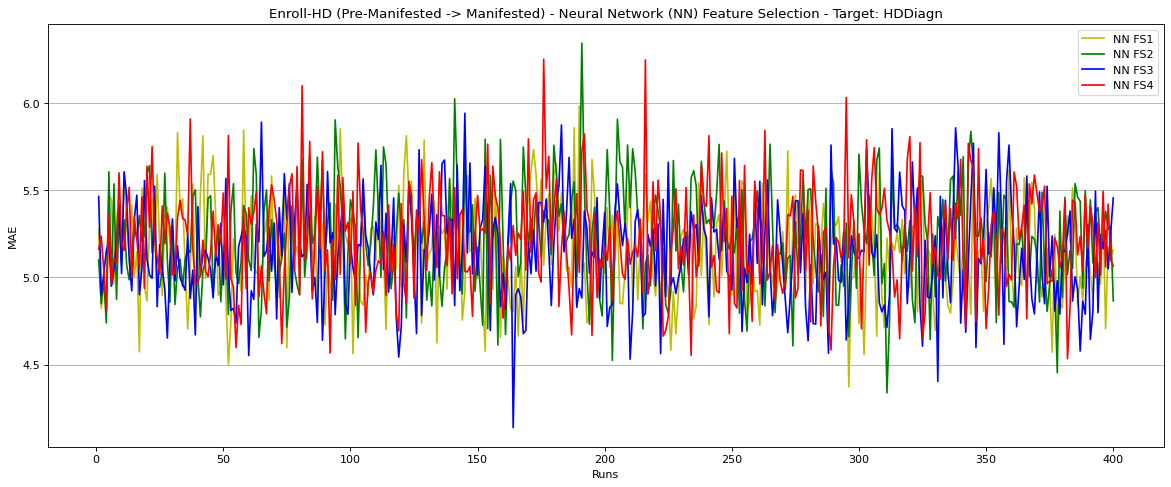

In [29]:
## MAE Graph - Neural Network Feature Selection Evaluation

mae_n_fs1 = []
for i in range(len(nn_res_fs1)): mae_n_fs1.append(nn_res_fs1[i][0])
mae_n_fs2 = []
for i in range(len(nn_res_fs2)): mae_n_fs2.append(nn_res_fs2[i][0])
mae_n_fs3 = []
for i in range(len(nn_res_fs3)): mae_n_fs3.append(nn_res_fs3[i][0])
mae_n_fs4 = []
for i in range(len(nn_res_fs4)): mae_n_fs4.append(nn_res_fs4[i][0])
    
runs = range(1, len(nn_res_fs4)+1)

plt.figure(figsize = (18,7))
plt.plot(runs, mae_n_fs1, color='y', label='NN FS1')
plt.plot(runs, mae_n_fs2, color='g', label='NN FS2')
plt.plot(runs, mae_n_fs3, color='b', label='NN FS3')
plt.plot(runs, mae_n_fs4, color='r', label='NN FS4')

plt.ylabel('MAE')
plt.xlabel('Runs')
plt.xticks(range(0,len(cb_res_fs1)+1,50))
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Neural Network (NN) Feature Selection - Target: HDDiagn')
plt.grid(axis='y')
plt.legend()
plt.show()

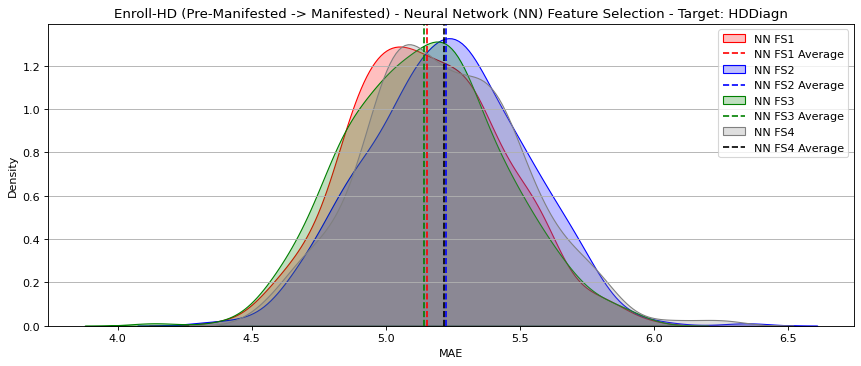

In [30]:
## MAE Graph - Neural Network Feature Selection Evaluation

nn_df1 = pd.DataFrame(nn_res_fs1, columns=['mae', 'rmse', 'r2'])
nn_df2 = pd.DataFrame(nn_res_fs2, columns=['mae', 'rmse', 'r2'])
nn_df3 = pd.DataFrame(nn_res_fs3, columns=['mae', 'rmse', 'r2'])
nn_df4 = pd.DataFrame(nn_res_fs4, columns=['mae', 'rmse', 'r2'])

fig, ax = plt.subplots(1, 1, figsize=(13,5))
sns.kdeplot(nn_df1, x="mae", color='r', ax=ax, label='NN FS1', fill=True)
plt.axvline(np.nanmean(mae_n_fs1), 0,9, color='r', linestyle='--', label='NN FS1 Average')
sns.kdeplot(nn_df2, x="mae", color='b',ax=ax, label='NN FS2', fill=True)
plt.axvline(np.nanmean(mae_n_fs2), 0,9, color='b', linestyle='--', label='NN FS2 Average')
sns.kdeplot(nn_df3, x="mae", color='g',ax=ax, label='NN FS3', fill=True)
plt.axvline(np.nanmean(mae_n_fs3), 0,9, color='g', linestyle='--', label='NN FS3 Average')
sns.kdeplot(nn_df4, x="mae", color='gray',ax=ax, label='NN FS4', fill=True)
plt.axvline(np.nanmean(mae_n_fs4), 0,9, color='black', linestyle='--', label='NN FS4 Average')

plt.xlabel('MAE')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Neural Network (NN) Feature Selection - Target: HDDiagn')
plt.legend()
plt.grid(axis='y')
plt.show()


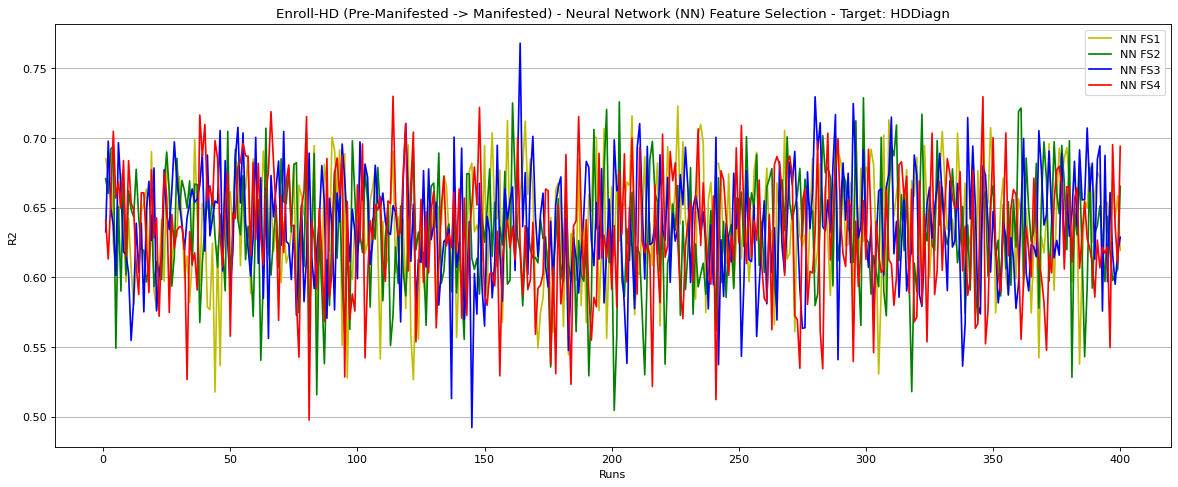

In [31]:
## R2 Graph - Neural Network Feature Selection Evaluation

r2_n_fs1 = []
for i in range(len(nn_res_fs1)): r2_n_fs1.append(nn_res_fs1[i][2])
r2_n_fs2 = []
for i in range(len(nn_res_fs2)): r2_n_fs2.append(nn_res_fs2[i][2])
r2_n_fs3 = []
for i in range(len(nn_res_fs3)): r2_n_fs3.append(nn_res_fs3[i][2])
r2_n_fs4 = []
for i in range(len(nn_res_fs4)): r2_n_fs4.append(nn_res_fs4[i][2])
    
runs = range(1, len(nn_res_fs4)+1)

plt.figure(figsize = (18,7))
plt.plot(runs, r2_n_fs1, color='y', label='NN FS1')
plt.plot(runs, r2_n_fs2, color='g', label='NN FS2')
plt.plot(runs, r2_n_fs3, color='b', label='NN FS3')
plt.plot(runs, r2_n_fs4, color='r', label='NN FS4')

plt.ylabel('R2')
plt.xlabel('Runs')
plt.xticks(range(0,len(cb_res_fs1)+1,50))
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Neural Network (NN) Feature Selection - Target: HDDiagn')
plt.grid(axis='y')
plt.legend()
plt.show()

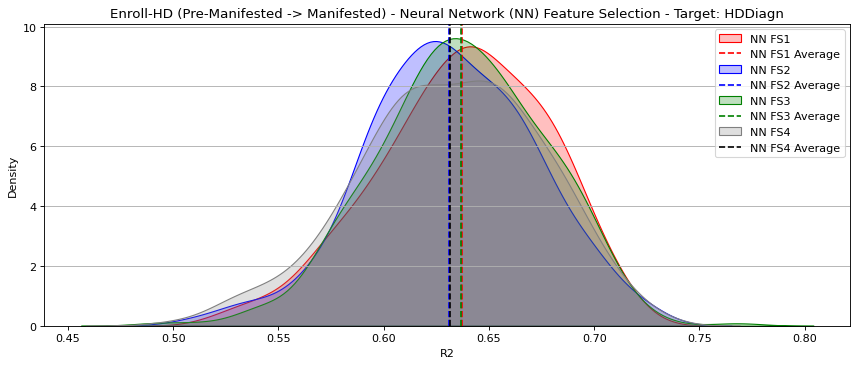

In [32]:
## R2 Graph - Neural Network Feature Selection Evaluation

nn_df1 = pd.DataFrame(nn_res_fs1, columns=['mae', 'rmse', 'r2'])
nn_df2 = pd.DataFrame(nn_res_fs2, columns=['mae', 'rmse', 'r2'])
nn_df3 = pd.DataFrame(nn_res_fs3, columns=['mae', 'rmse', 'r2'])
nn_df4 = pd.DataFrame(nn_res_fs4, columns=['mae', 'rmse', 'r2'])

fig, ax = plt.subplots(1, 1, figsize=(13,5))
sns.kdeplot(nn_df1, x="r2", color='r', ax=ax, label='NN FS1', fill=True)
plt.axvline(np.nanmean(r2_n_fs1), 0,9, color='r', linestyle='--', label='NN FS1 Average')
sns.kdeplot(nn_df2, x="r2", color='b',ax=ax, label='NN FS2', fill=True)
plt.axvline(np.nanmean(r2_n_fs2), 0,9, color='b', linestyle='--', label='NN FS2 Average')
sns.kdeplot(nn_df3, x="r2", color='g',ax=ax, label='NN FS3', fill=True)
plt.axvline(np.nanmean(r2_n_fs3), 0,9, color='g', linestyle='--', label='NN FS3 Average')
sns.kdeplot(nn_df4, x="r2", color='gray',ax=ax, label='NN FS4', fill=True)
plt.axvline(np.nanmean(r2_n_fs4), 0,9, color='black', linestyle='--', label='NN FS4 Average')

plt.xlabel('R2')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Neural Network (NN) Feature Selection - Target: HDDiagn')
plt.legend()
plt.grid(axis='y')
plt.show()


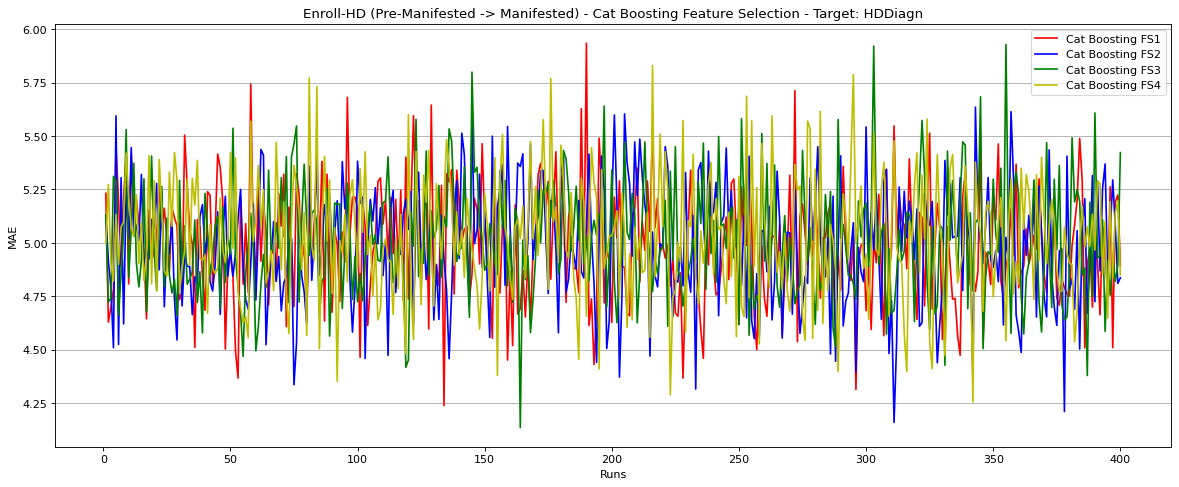

In [33]:
## MAE Graph - CatBoosting Feature Selection Evaluation

mae_c_fs1 = []
for i in range(len(cb_res_fs1)): mae_c_fs1.append(cb_res_fs1[i][0])   
mae_c_fs2 = []
for i in range(len(cb_res_fs2)): mae_c_fs2.append(cb_res_fs2[i][0])   
mae_c_fs3 = []
for i in range(len(cb_res_fs3)): mae_c_fs3.append(cb_res_fs3[i][0])   
mae_c_fs4 = []
for i in range(len(cb_res_fs4)): mae_c_fs4.append(cb_res_fs4[i][0])
    
runs = range(1, len(cb_res_fs4)+1)

plt.figure(figsize = (18,7))
plt.plot(runs, mae_c_fs1, 'r', label='Cat Boosting FS1')
plt.plot(runs, mae_c_fs2, 'b', label='Cat Boosting FS2')  
plt.plot(runs, mae_c_fs3, 'g', label='Cat Boosting FS3')
plt.plot(runs, mae_c_fs4, 'y', label='Cat Boosting FS4')

plt.ylabel('MAE')
plt.xlabel('Runs')
plt.xticks(range(0,len(cb_res_fs1)+1,50))
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Cat Boosting Feature Selection - Target: HDDiagn')
plt.grid(axis='y')
plt.legend()
plt.show()

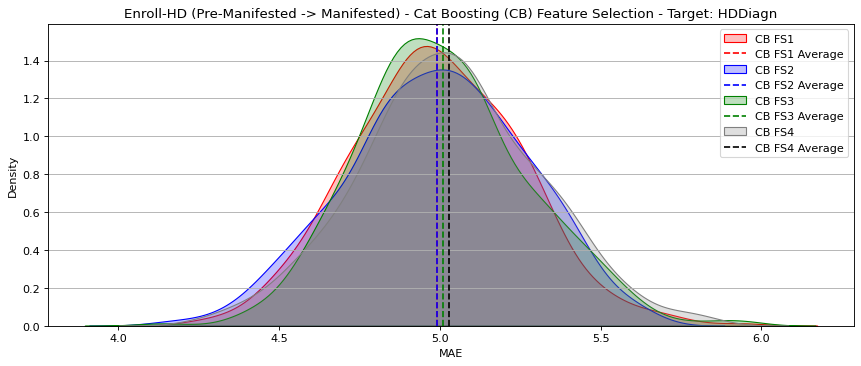

In [34]:
## MAE Graph - CatBoosting Feature Selection Evaluation

cb_df1 = pd.DataFrame(cb_res_fs1, columns=['mae', 'rmse', 'r2'])
cb_df2 = pd.DataFrame(cb_res_fs2, columns=['mae', 'rmse', 'r2'])
cb_df3 = pd.DataFrame(cb_res_fs3, columns=['mae', 'rmse', 'r2'])
cb_df4 = pd.DataFrame(cb_res_fs4, columns=['mae', 'rmse', 'r2'])

fig, ax = plt.subplots(1, 1, figsize=(13,5))
sns.kdeplot(cb_df1, x="mae", color='r', ax=ax, label='CB FS1', fill=True)
plt.axvline(np.nanmean(mae_c_fs1), 0,9, color='r', linestyle='--', label='CB FS1 Average')
sns.kdeplot(cb_df2, x="mae", color='b',ax=ax, label='CB FS2', fill=True)
plt.axvline(np.nanmean(mae_c_fs2), 0,9, color='b', linestyle='--', label='CB FS2 Average')
sns.kdeplot(cb_df3, x="mae", color='g',ax=ax, label='CB FS3', fill=True)
plt.axvline(np.nanmean(mae_c_fs3), 0,9, color='g', linestyle='--', label='CB FS3 Average')
sns.kdeplot(cb_df4, x="mae", color='gray',ax=ax, label='CB FS4', fill=True)
plt.axvline(np.nanmean(mae_c_fs4), 0,9, color='black', linestyle='--', label='CB FS4 Average')

plt.xlabel('MAE')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Cat Boosting (CB) Feature Selection - Target: HDDiagn')
plt.legend()
plt.grid(axis='y')
plt.show()


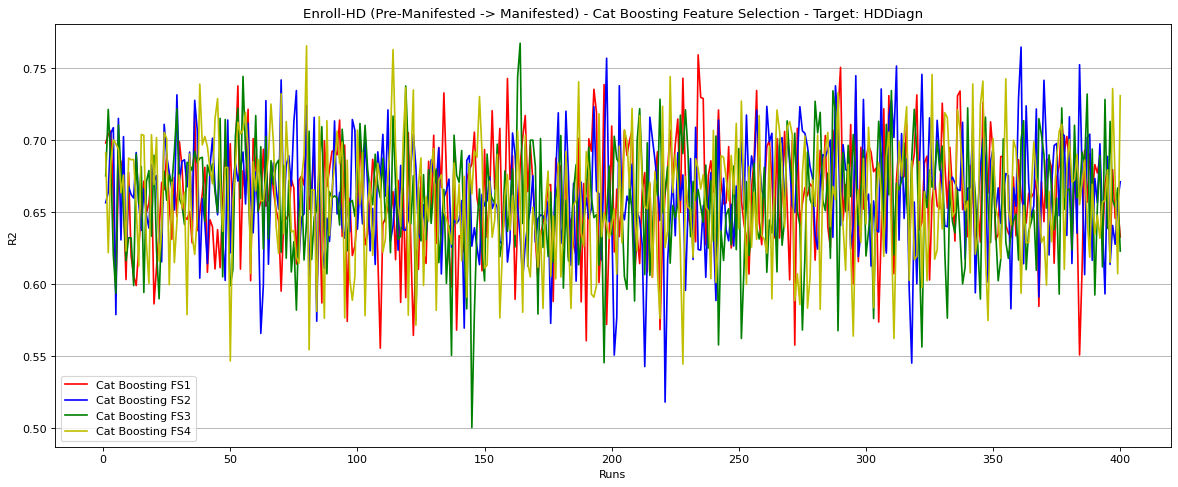

In [35]:
## R2 Graph - CatBoosting Feature Selection Evaluation

r2_c_fs1 = []
for i in range(len(cb_res_fs1)): r2_c_fs1.append(cb_res_fs1[i][2])   
r2_c_fs2 = []
for i in range(len(cb_res_fs2)): r2_c_fs2.append(cb_res_fs2[i][2])   
r2_c_fs3 = []
for i in range(len(cb_res_fs3)): r2_c_fs3.append(cb_res_fs3[i][2])   
r2_c_fs4 = []
for i in range(len(cb_res_fs4)): r2_c_fs4.append(cb_res_fs4[i][2])
    
runs = range(1, len(cb_res_fs4)+1)

plt.figure(figsize = (18,7))
plt.plot(runs, r2_c_fs1, 'r', label='Cat Boosting FS1')
plt.plot(runs, r2_c_fs2, 'b', label='Cat Boosting FS2')  
plt.plot(runs, r2_c_fs3, 'g', label='Cat Boosting FS3')
plt.plot(runs, r2_c_fs4, 'y', label='Cat Boosting FS4')

plt.ylabel('R2')
plt.xlabel('Runs')
plt.xticks(range(0,len(cb_res_fs1)+1,50))
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Cat Boosting Feature Selection - Target: HDDiagn')
plt.grid(axis='y')
plt.legend()
plt.show()

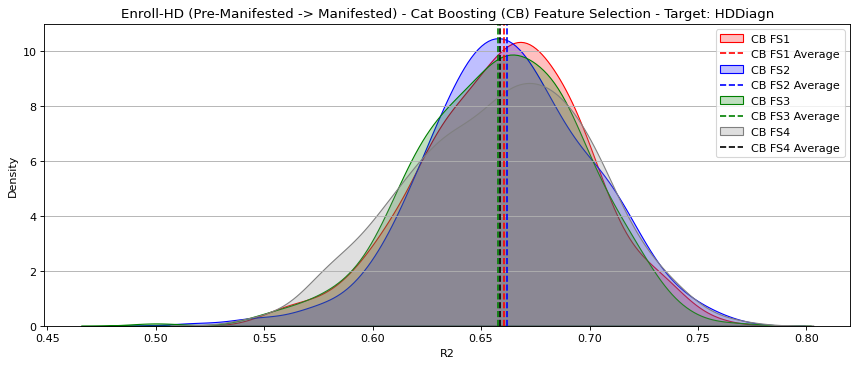

In [36]:
## R2 Graph - CatBoosting Feature Selection Evaluation

cb_df1 = pd.DataFrame(cb_res_fs1, columns=['mae', 'rmse', 'r2'])
cb_df2 = pd.DataFrame(cb_res_fs2, columns=['mae', 'rmse', 'r2'])
cb_df3 = pd.DataFrame(cb_res_fs3, columns=['mae', 'rmse', 'r2'])
cb_df4 = pd.DataFrame(cb_res_fs4, columns=['mae', 'rmse', 'r2'])

fig, ax = plt.subplots(1, 1, figsize=(13,5))
sns.kdeplot(cb_df1, x="r2", color='r', ax=ax, label='CB FS1', fill=True)
plt.axvline(np.nanmean(r2_c_fs1), 0,9, color='r', linestyle='--', label='CB FS1 Average')
sns.kdeplot(cb_df2, x="r2", color='b',ax=ax, label='CB FS2', fill=True)
plt.axvline(np.nanmean(r2_c_fs2), 0,9, color='b', linestyle='--', label='CB FS2 Average')
sns.kdeplot(cb_df3, x="r2", color='g',ax=ax, label='CB FS3', fill=True)
plt.axvline(np.nanmean(r2_c_fs3), 0,9, color='g', linestyle='--', label='CB FS3 Average')
sns.kdeplot(cb_df4, x="r2", color='gray',ax=ax, label='CB FS4', fill=True)
plt.axvline(np.nanmean(r2_c_fs4), 0,9, color='black', linestyle='--', label='CB FS4 Average')

plt.xlabel('R2')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Cat Boosting (CB) Feature Selection - Target: HDDiagn')
plt.legend()
plt.grid(axis='y')
plt.show()


#### Tuning the Models

In [10]:
## Tuning the Cat Boosting 

# Parameters
cag_min = 40
cag_max = 61
runOneHotEnc = 1
target = 'hddiagn'

selection_2 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
              'region_impFill', 'nmdrgfrq_filled_impFill']


num_columns_pp = []
cat_columns_pp = []

for i in selection_2:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)      
        

cols = [num_columns_pp, cat_columns_pp]

for i in range(10):
    print("Execution no.", i+1)
    tune_cb_2 = aao.tuneCatBoost(feat_model_df, cag_min, cag_max, cols, target, runOneHotEnc)
    print("Cat Boosting:", tune_cb_2.best_params_)

Execution no. 1
Training Cat Boosting using GridSearchCV
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Cat Boosting: {'depth': 3, 'iterations': 800, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Execution no. 2
Training Cat Boosting using GridSearchCV
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Cat Boosting: {'depth': 3, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
Execution no. 3
Training Cat Boosting using GridSearchCV
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Cat Boosting: {'depth': 3, 'iterations': 1200, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
Execution no. 4
Training Cat Boosting using GridSearchCV
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Cat Boosting: {'depth': 3, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Execution no. 5
Training Cat Boosting using GridSearchCV
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Cat Boosting: {'depth': 3, 'iterations': 1000, 'l

In [9]:
## Tuning the Neural Network

# Parameters
cag_min = 40
cag_max = 61
runOneHotEnc = 1
target = 'hddiagn'
nn_iter = 20

selection_2 = ['caghigh', 'parentagesx_impFill', 'hxtobyos_impFill', 'emplnrsn_filled_impFill', 'maristat_filled_impFill',
              'region_impFill', 'nmdrgfrq_filled_impFill']

num_columns_pp = []
cat_columns_pp = []

for i in selection_2:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)      
        

cols = [num_columns_pp, cat_columns_pp]
packages = [(125, 15), (150, 20), (100, 10), (125, 10), (150,5), (100,1), (100, 3), (100,5)]

ResultsData = aao.FindBestParams_NN(feat_model_df, nn_iter, cols, target_pp, cag_min, cag_max, packages)
print(ResultsData.sort_values('MAE', ascending=True).head(10))

6/6 [==============================] - 0s 1ms/step
Run: 1 - 0 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.597 52.684 7.258 0.559 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 1 - 1 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.250 46.657 6.831 0.601 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 1 - 2 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 4.997 40.503 6.364 0.668 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 1 - 3 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.928 59.801 7.733 0.584 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 1 - 4 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.215 45.202 6.723 0.585 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step
Run: 3 - 3 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.634 53.833 7.337 0.514 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 3 - 4 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.643 53.626 7.323 0.576 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 3 - 5 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.919 53.804 7.335 0.551 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 3 - 6 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.526 49.500 7.036 0.613 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 3 - 7 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.643 50.193 7.085 0.617 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================

6/6 [==============================] - 0s 2ms/step
Run: 5 - 6 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.384 47.877 6.919 0.624 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 5 - 7 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.223 45.722 6.762 0.548 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 5 - 8 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 4.958 39.489 6.284 0.699 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 5 - 9 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.688 51.608 7.184 0.613 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 5 - 10 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.514 51.457 7.173 0.623 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [=============================

6/6 [==============================] - 0s 2ms/step
Run: 7 - 9 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.130 41.855 6.470 0.612 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 7 - 10 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.026 39.351 6.273 0.661 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 7 - 11 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.405 46.937 6.851 0.548 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 7 - 12 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 4.947 42.711 6.535 0.631 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 7 - 13 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 6.128 59.805 7.733 0.582 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================]

6/6 [==============================] - 0s 3ms/step
Run: 9 - 12 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.608 47.984 6.927 0.556 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 9 - 13 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.517 50.101 7.078 0.554 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 9 - 14 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.608 53.046 7.283 0.546 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 9 - 15 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.031 36.857 6.071 0.658 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 9 - 16 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.374 49.709 7.050 0.583 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [=========================

6/6 [==============================] - 0s 2ms/step
Run: 13 - 16 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.208 45.900 6.775 0.664 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 13 - 17 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.636 51.235 7.158 0.599 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 13 - 18 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.241 46.158 6.794 0.610 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 13 - 19 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.363 44.697 6.686 0.658 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 14 - 0 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 4.726 39.017 6.246 0.650 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 15 - 18 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.263 42.677 6.533 0.689 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 15 - 19 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.204 42.103 6.489 0.653 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 16 - 0 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.535 51.541 7.179 0.512 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 16 - 1 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 4.964 37.815 6.149 0.684 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 16 - 2 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.327 42.826 6.544 0.654 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [=====================

6/6 [==============================] - 0s 2ms/step
Run: 20 - 2 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.465 48.852 6.989 0.584 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 20 - 3 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.747 58.867 7.673 0.421 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 20 - 4 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 6.049 57.790 7.602 0.537 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 20 - 5 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.237 44.771 6.691 0.643 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 20 - 6 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.300 44.873 6.699 0.564 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [====================

6/6 [==============================] - 0s 1ms/step
Run: 22 - 4 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.306 44.831 6.696 0.642 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 22 - 5 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.840 52.951 7.277 0.537 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 22 - 6 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.571 48.505 6.965 0.622 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 22 - 7 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.586 47.103 6.863 0.599 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 22 - 8 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.001 38.327 6.191 0.675 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [=========================

6/6 [==============================] - 0s 2ms/step
Run: 24 - 6 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.772 59.999 7.746 0.477 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 24 - 7 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.534 51.251 7.159 0.576 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 24 - 8 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.640 49.172 7.012 0.632 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 24 - 9 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.790 53.661 7.325 0.540 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 24 - 10 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 4.835 37.602 6.132 0.641 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [===================

6/6 [==============================] - 0s 2ms/step
Run: 28 - 10 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 4.735 35.312 5.942 0.681 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 28 - 11 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.133 46.058 6.787 0.641 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 28 - 12 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.665 51.151 7.152 0.636 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 28 - 13 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.638 53.397 7.307 0.536 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 28 - 14 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.241 48.352 6.954 0.591 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 30 - 12 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.049 41.627 6.452 0.664 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 30 - 13 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.202 41.530 6.444 0.656 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 30 - 14 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.566 50.924 7.136 0.596 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 30 - 15 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.206 47.238 6.873 0.615 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 30 - 16 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.277 41.912 6.474 0.623 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 1ms/step
Run: 32 - 14 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.743 52.650 7.256 0.538 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 32 - 15 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.896 52.550 7.249 0.590 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 32 - 16 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.353 44.278 6.654 0.655 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 32 - 17 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.346 44.900 6.701 0.622 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 32 - 18 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.260 46.833 6.843 0.580 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 1ms/step
Run: 34 - 16 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.122 41.918 6.474 0.630 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 34 - 17 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.934 59.676 7.725 0.571 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 34 - 18 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 6.102 61.055 7.814 0.593 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 34 - 19 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.610 47.977 6.927 0.556 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 35 - 0 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.919 62.736 7.921 0.486 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 3ms/step
Run: 36 - 18 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.693 52.391 7.238 0.627 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 4ms/step
Run: 36 - 19 / batch: 125 - epochs: 15 - Losses (mae/mse/rmse/r2): 5.272 47.836 6.916 0.601 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 37 - 0 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.458 48.216 6.944 0.613 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 37 - 1 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.648 50.132 7.080 0.606 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 37 - 2 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.595 47.314 6.879 0.608 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [======================

6/6 [==============================] - 0s 1ms/step
Run: 41 - 2 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.021 45.596 6.752 0.618 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 41 - 3 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.508 50.153 7.082 0.598 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 41 - 4 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 4.887 38.280 6.187 0.674 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 41 - 5 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.157 46.787 6.840 0.602 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 41 - 6 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.390 44.341 6.659 0.665 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [=========================

6/6 [==============================] - 0s 3ms/step
Run: 45 - 6 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.333 45.766 6.765 0.632 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 45 - 7 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.102 43.698 6.610 0.611 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 45 - 8 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 6.206 63.162 7.947 0.510 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 45 - 9 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.202 50.184 7.084 0.552 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 45 - 10 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.190 44.080 6.639 0.628 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [========================

6/6 [==============================] - 0s 2ms/step
Run: 49 - 10 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.361 50.784 7.126 0.594 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 49 - 11 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.383 47.184 6.869 0.624 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 49 - 12 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.033 44.310 6.657 0.658 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 49 - 13 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.199 45.231 6.725 0.615 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 49 - 14 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 4.795 38.795 6.229 0.685 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [====================

6/6 [==============================] - 0s 3ms/step
Run: 51 - 12 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 6.009 61.533 7.844 0.499 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 51 - 13 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.289 42.794 6.542 0.674 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 51 - 14 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 4.913 39.253 6.265 0.694 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 51 - 15 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.572 51.298 7.162 0.562 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 51 - 16 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 4.790 37.452 6.120 0.671 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 55 - 16 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.689 51.659 7.187 0.578 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 55 - 17 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 4.893 41.977 6.479 0.599 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 55 - 18 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 6.108 55.648 7.460 0.573 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 55 - 19 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.546 50.806 7.128 0.636 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 56 - 0 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.926 56.414 7.511 0.570 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 57 - 18 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 6.006 59.703 7.727 0.555 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 57 - 19 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.258 45.522 6.747 0.609 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 58 - 0 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.306 47.388 6.884 0.604 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 58 - 1 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.906 61.904 7.868 0.484 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 58 - 2 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.144 46.578 6.825 0.643 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [=====================

6/6 [==============================] - 0s 2ms/step
Run: 62 - 2 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.715 53.569 7.319 0.554 -Units: 128 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 62 - 3 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.806 52.651 7.256 0.584 -Units: 128 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 62 - 4 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 4.994 40.917 6.397 0.669 -Units: 128 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 62 - 5 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.621 50.723 7.122 0.551 -Units: 128 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 62 - 6 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.436 48.935 6.995 0.657 -Units: 128 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 64 - 4 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.320 46.698 6.834 0.626 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 64 - 5 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 4.612 37.337 6.110 0.702 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 64 - 6 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.190 45.697 6.760 0.639 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 64 - 7 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.354 47.683 6.905 0.568 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 64 - 8 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 4.994 41.094 6.410 0.651 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [====================

6/6 [==============================] - 0s 3ms/step
Run: 66 - 6 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.590 46.659 6.831 0.583 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 66 - 7 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.381 50.904 7.135 0.604 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 66 - 8 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.390 48.512 6.965 0.619 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 66 - 9 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.463 46.917 6.850 0.610 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 66 - 10 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.109 49.989 7.070 0.613 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============

6/6 [==============================] - 0s 2ms/step
Run: 68 - 8 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.764 57.214 7.564 0.521 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 68 - 9 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.483 51.087 7.148 0.560 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 68 - 10 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.177 44.147 6.644 0.641 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 68 - 11 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.257 47.367 6.882 0.593 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 68 - 12 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.515 54.281 7.368 0.618 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [============

6/6 [==============================] - 0s 2ms/step
Run: 70 - 10 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 4.976 40.385 6.355 0.636 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 70 - 11 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.033 40.538 6.367 0.676 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 70 - 12 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.153 44.061 6.638 0.587 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 70 - 13 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.249 44.685 6.685 0.604 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 70 - 14 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.093 46.482 6.818 0.652 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 3ms/step
Run: 72 - 12 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.651 51.348 7.166 0.572 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 72 - 13 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.655 51.608 7.184 0.599 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 72 - 14 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.417 50.429 7.101 0.572 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 72 - 15 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.501 49.166 7.012 0.648 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 72 - 16 / batch: 150 - epochs: 20 - Losses (mae/mse/rmse/r2): 5.958 57.237 7.566 0.515 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 1ms/step
Run: 76 - 16 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.715 54.269 7.367 0.613 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 76 - 17 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.529 48.691 6.978 0.659 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 76 - 18 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.299 45.036 6.711 0.655 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 76 - 19 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.820 54.157 7.359 0.534 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 77 - 0 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.442 51.158 7.152 0.455 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [=========================

6/6 [==============================] - 0s 3ms/step
Run: 81 - 0 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.354 43.462 6.593 0.612 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 81 - 1 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.450 47.281 6.876 0.622 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 81 - 2 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.275 44.018 6.635 0.647 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 81 - 3 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.221 45.851 6.771 0.603 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 81 - 4 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.705 54.716 7.397 0.579 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [=========================

6/6 [==============================] - 0s 1ms/step
Run: 85 - 4 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.111 43.777 6.616 0.704 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 85 - 5 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.106 41.803 6.466 0.679 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 85 - 6 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.647 53.983 7.347 0.575 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 85 - 7 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.296 46.732 6.836 0.622 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 85 - 8 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.254 45.011 6.709 0.642 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [=========================

6/6 [==============================] - 0s 3ms/step
Run: 87 - 6 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.528 49.197 7.014 0.572 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 87 - 7 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.297 43.450 6.592 0.581 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 87 - 8 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.484 50.558 7.110 0.605 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 87 - 9 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.610 49.239 7.017 0.560 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 87 - 10 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.294 47.559 6.896 0.558 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [===================

6/6 [==============================] - 0s 2ms/step
Run: 91 - 10 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.300 48.377 6.955 0.635 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 91 - 11 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.552 50.219 7.087 0.592 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 91 - 12 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.534 47.807 6.914 0.583 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 91 - 13 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.428 44.898 6.701 0.623 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 91 - 14 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.690 36.195 6.016 0.699 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 93 - 12 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.998 39.214 6.262 0.682 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 93 - 13 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.355 48.325 6.952 0.643 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 93 - 14 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.128 46.058 6.787 0.609 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 93 - 15 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.591 50.600 7.113 0.550 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 93 - 16 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.423 49.825 7.059 0.645 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 97 - 16 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.991 41.140 6.414 0.596 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 97 - 17 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.366 46.654 6.830 0.574 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 97 - 18 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.530 45.349 6.734 0.674 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 97 - 19 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 6.020 61.687 7.854 0.465 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 98 - 0 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.256 45.364 6.735 0.605 -Units: 128 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [====================

6/6 [==============================] - 0s 3ms/step
Run: 99 - 18 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 6.044 55.509 7.450 0.570 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 99 - 19 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.247 40.030 6.327 0.687 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 100 - 0 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.091 41.190 6.418 0.675 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 100 - 1 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.519 46.937 6.851 0.629 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 100 - 2 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.769 39.976 6.323 0.681 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 102 - 0 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.660 55.895 7.476 0.500 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 102 - 1 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.311 49.626 7.045 0.527 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 102 - 2 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.441 43.663 6.608 0.616 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 102 - 3 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.962 39.527 6.287 0.677 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 102 - 4 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.553 51.669 7.188 0.625 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 2ms/step
Run: 104 - 2 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.322 45.803 6.768 0.678 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 104 - 3 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.782 58.950 7.678 0.536 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 104 - 4 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.189 44.511 6.672 0.577 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 104 - 5 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 6.445 69.724 8.350 0.498 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 104 - 6 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.781 51.829 7.199 0.587 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 2ms/step
Run: 106 - 4 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.844 54.516 7.383 0.536 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 106 - 5 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.316 48.094 6.935 0.492 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 106 - 6 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.759 53.080 7.286 0.591 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 106 - 7 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.474 45.206 6.724 0.662 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 106 - 8 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.530 36.119 6.010 0.695 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 3ms/step
Run: 108 - 6 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.320 43.255 6.577 0.606 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 108 - 7 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.391 46.553 6.823 0.646 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 108 - 8 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.012 42.956 6.554 0.556 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 108 - 9 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.710 51.486 7.175 0.626 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 108 - 10 / batch: 100 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.487 49.097 7.007 0.612 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [=========

6/6 [==============================] - 0s 2ms/step
Run: 110 - 8 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.590 47.345 6.881 0.629 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 110 - 9 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.279 43.541 6.599 0.641 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 110 - 10 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.729 39.851 6.313 0.636 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 110 - 11 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.631 48.648 6.975 0.580 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 110 - 12 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.057 44.142 6.644 0.592 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [=================

6/6 [==============================] - 0s 2ms/step
Run: 112 - 10 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.952 38.382 6.195 0.645 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 112 - 11 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.284 43.701 6.611 0.675 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 112 - 12 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.386 51.826 7.199 0.542 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 112 - 13 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.247 47.086 6.862 0.604 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 112 - 14 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.270 44.421 6.665 0.650 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 114 - 12 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.300 44.815 6.694 0.649 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 114 - 13 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.609 50.563 7.111 0.562 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 114 - 14 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.027 44.111 6.642 0.656 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 114 - 15 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.536 51.534 7.179 0.607 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 114 - 16 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.941 43.076 6.563 0.628 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 1ms/step
Run: 118 - 16 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.954 42.416 6.513 0.672 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 118 - 17 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.834 54.234 7.364 0.535 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 118 - 18 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.859 53.504 7.315 0.584 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 118 - 19 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.445 46.181 6.796 0.609 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 119 - 0 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.325 45.374 6.736 0.638 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 120 - 18 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.061 42.500 6.519 0.689 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 120 - 19 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.586 53.636 7.324 0.604 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 121 - 0 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.675 50.123 7.080 0.549 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 121 - 1 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.785 39.119 6.255 0.677 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 121 - 2 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.527 46.799 6.841 0.576 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [================

6/6 [==============================] - 0s 4ms/step
Run: 123 - 0 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.709 50.923 7.136 0.665 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 123 - 1 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.419 48.154 6.939 0.601 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 123 - 2 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.334 46.992 6.855 0.634 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 123 - 3 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.177 46.761 6.838 0.652 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 123 - 4 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 6.197 64.087 8.005 0.503 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 125 - 2 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.404 49.334 7.024 0.595 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 125 - 3 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 6.113 58.770 7.666 0.539 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 125 - 4 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.852 55.502 7.450 0.566 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 125 - 5 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.791 51.994 7.211 0.582 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 125 - 6 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.322 45.420 6.739 0.644 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 127 - 4 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.619 47.498 6.892 0.572 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 127 - 5 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.187 46.048 6.786 0.616 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 127 - 6 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.677 54.546 7.386 0.590 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 127 - 7 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.118 45.321 6.732 0.613 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 127 - 8 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.122 45.050 6.712 0.600 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 129 - 6 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.730 57.587 7.589 0.523 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 129 - 7 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.855 53.838 7.337 0.506 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 129 - 8 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.598 55.511 7.451 0.548 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 129 - 9 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.782 35.806 5.984 0.715 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 129 - 10 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.512 51.594 7.183 0.548 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============

6/6 [==============================] - 0s 2ms/step
Run: 131 - 8 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.044 42.351 6.508 0.673 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 131 - 9 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.593 56.265 7.501 0.559 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 131 - 10 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.447 48.211 6.943 0.611 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 131 - 11 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.201 45.380 6.736 0.606 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 131 - 12 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.212 44.624 6.680 0.591 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [============

6/6 [==============================] - 0s 2ms/step
Run: 133 - 10 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.931 38.206 6.181 0.641 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 133 - 11 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.385 44.297 6.656 0.585 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 133 - 12 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.320 45.117 6.717 0.628 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 133 - 13 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.412 47.490 6.891 0.608 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 133 - 14 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.303 46.456 6.816 0.623 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 3ms/step
Run: 135 - 12 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.545 49.331 7.024 0.629 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 135 - 13 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.451 47.691 6.906 0.646 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 135 - 14 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.627 48.044 6.931 0.569 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 135 - 15 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.586 49.807 7.057 0.612 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 135 - 16 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.490 47.666 6.904 0.604 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 2ms/step
Run: 137 - 14 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.286 43.619 6.604 0.632 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 137 - 15 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.908 44.464 6.668 0.617 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 137 - 16 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.318 47.581 6.898 0.553 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 137 - 17 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.519 51.700 7.190 0.613 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 137 - 18 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.680 49.818 7.058 0.597 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [=====

6/6 [==============================] - 0s 2ms/step
Run: 139 - 16 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.322 45.114 6.717 0.621 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 139 - 17 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.987 45.600 6.753 0.656 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 139 - 18 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.672 51.885 7.203 0.575 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 139 - 19 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.660 50.193 7.085 0.603 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 140 - 0 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.536 51.776 7.196 0.591 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 3ms/step
Run: 141 - 18 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.144 44.760 6.690 0.584 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 141 - 19 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.360 43.526 6.597 0.647 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 142 - 0 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.773 55.829 7.472 0.505 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 142 - 1 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.595 51.147 7.152 0.564 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 142 - 2 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.082 44.940 6.704 0.678 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===========

6/6 [==============================] - 0s 3ms/step
Run: 144 - 0 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.851 51.463 7.174 0.512 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 144 - 1 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.754 51.030 7.144 0.554 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 144 - 2 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.655 51.546 7.180 0.523 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 144 - 3 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 4.946 40.882 6.394 0.684 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 144 - 4 / batch: 125 - epochs: 10 - Losses (mae/mse/rmse/r2): 5.567 48.333 6.952 0.579 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 1ms/step
Run: 146 - 2 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.471 49.478 7.034 0.650 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 146 - 3 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.880 52.984 7.279 0.574 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 146 - 4 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.620 48.686 6.978 0.608 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 146 - 5 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.619 48.845 6.989 0.510 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 146 - 6 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.599 66.602 8.161 0.489 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [=========================

6/6 [==============================] - 0s 2ms/step
Run: 150 - 6 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.992 56.537 7.519 0.571 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 150 - 7 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.175 45.251 6.727 0.590 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 150 - 8 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.559 50.223 7.087 0.605 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 150 - 9 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.581 50.814 7.128 0.569 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 150 - 10 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.340 47.322 6.879 0.609 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [========================

6/6 [==============================] - 0s 2ms/step
Run: 154 - 10 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 8.093 91.776 9.580 0.195 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 154 - 11 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 8.557 109.167 10.448 0.067 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 154 - 12 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 9.296 127.446 11.289 0.103 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 154 - 13 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 9.865 141.660 11.902 0.099 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 154 - 14 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 8.658 112.147 10.590 0.059 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [============

6/6 [==============================] - 0s 2ms/step
Run: 156 - 12 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.154 39.678 6.299 0.667 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 156 - 13 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.769 54.859 7.407 0.576 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 156 - 14 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.495 47.988 6.927 0.618 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 156 - 15 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.340 46.770 6.839 0.583 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 156 - 16 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.020 40.293 6.348 0.605 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 158 - 14 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.243 61.598 7.848 0.491 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 158 - 15 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.647 52.534 7.248 0.516 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 158 - 16 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.221 63.840 7.990 0.488 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 158 - 17 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.588 50.481 7.105 0.546 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 158 - 18 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.036 57.744 7.599 0.514 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 160 - 16 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 9.187 123.976 11.134 0.006 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 160 - 17 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 8.092 97.418 9.870 0.005 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 160 - 18 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 9.286 129.806 11.393 0.004 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 160 - 19 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 8.869 113.937 10.674 0.004 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 161 - 0 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 7.933 93.575 9.673 0.226 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============

6/6 [==============================] - 0s 2ms/step
Run: 162 - 18 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.744 51.114 7.149 0.561 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 162 - 19 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.242 47.785 6.913 0.635 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 163 - 0 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.227 43.813 6.619 0.573 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 163 - 1 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.481 46.056 6.786 0.567 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 163 - 2 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.007 59.183 7.693 0.490 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [=====================

6/6 [==============================] - 0s 2ms/step
Run: 165 - 0 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.960 61.211 7.824 0.513 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 165 - 1 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.943 57.796 7.602 0.526 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 165 - 2 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 4.902 37.684 6.139 0.687 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 165 - 3 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.669 49.027 7.002 0.572 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 165 - 4 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.225 45.286 6.729 0.566 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 169 - 4 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.984 55.724 7.465 0.536 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 169 - 5 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.380 50.925 7.136 0.576 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 169 - 6 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.881 56.750 7.533 0.541 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 169 - 7 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.929 57.477 7.581 0.478 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 169 - 8 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.803 55.960 7.481 0.566 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [=========================

6/6 [==============================] - 0s 2ms/step
Run: 171 - 6 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.049 44.289 6.655 0.632 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 171 - 7 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.330 62.433 7.901 0.525 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 171 - 8 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.096 43.879 6.624 0.643 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 171 - 9 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.459 47.937 6.924 0.575 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 171 - 10 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.575 51.154 7.152 0.483 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [===================

6/6 [==============================] - 0s 2ms/step
Run: 173 - 8 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.762 51.854 7.201 0.570 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 173 - 9 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.552 49.884 7.063 0.611 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 173 - 10 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.917 57.226 7.565 0.548 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 173 - 11 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.025 41.572 6.448 0.647 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 173 - 12 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.698 49.063 7.004 0.627 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [============

6/6 [==============================] - 0s 2ms/step
Run: 175 - 10 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.491 64.582 8.036 0.526 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 175 - 11 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.071 57.439 7.579 0.549 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 175 - 12 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.947 58.088 7.622 0.542 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 175 - 13 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.826 51.865 7.202 0.493 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 175 - 14 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.650 52.157 7.222 0.557 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 177 - 12 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.863 55.672 7.461 0.557 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 177 - 13 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.900 56.780 7.535 0.580 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 177 - 14 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 4.923 40.519 6.365 0.666 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 177 - 15 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.127 59.526 7.715 0.565 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 177 - 16 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.560 51.925 7.206 0.590 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 2ms/step
Run: 179 - 14 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.976 58.537 7.651 0.532 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 179 - 15 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.185 44.088 6.640 0.638 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 179 - 16 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.263 44.325 6.658 0.612 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 179 - 17 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.855 56.735 7.532 0.529 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 179 - 18 / batch: 150 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.607 50.323 7.094 0.610 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 1ms/step
Run: 181 - 16 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.759 115.087 10.728 0.008 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 181 - 17 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.808 115.524 10.748 0.014 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 181 - 18 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.491 105.685 10.280 0.015 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 181 - 19 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.377 128.469 11.334 0.009 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 182 - 0 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.918 119.614 10.937 0.126 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 183 - 18 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.043 54.349 7.372 0.530 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 183 - 19 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 5.838 52.139 7.221 0.539 -Units: 256 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 184 - 0 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.910 114.884 10.718 0.011 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 184 - 1 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.391 129.155 11.365 0.011 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 184 - 2 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.339 130.409 11.420 0.014 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 186 - 0 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.314 66.465 8.153 0.346 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 186 - 1 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.091 60.135 7.755 0.516 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 186 - 2 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.345 65.118 8.070 0.499 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 186 - 3 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 5.972 61.645 7.851 0.480 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 186 - 4 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.360 63.706 7.982 0.479 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [=========================

6/6 [==============================] - 0s 1ms/step
Run: 188 - 2 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.784 115.596 10.752 0.012 -Units: 128 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 188 - 3 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.733 108.542 10.418 0.019 -Units: 128 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 188 - 4 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.028 117.146 10.823 0.021 -Units: 128 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 188 - 5 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.287 127.802 11.305 0.021 -Units: 128 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 188 - 6 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.615 111.993 10.583 0.020 -Units: 128 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 190 - 4 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.747 136.193 11.670 0.004 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 190 - 5 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.693 132.744 11.521 0.008 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 190 - 6 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.323 128.666 11.343 0.011 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 190 - 7 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.223 121.780 11.035 0.002 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 190 - 8 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.584 135.393 11.636 0.009 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 192 - 6 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.094 73.388 8.567 0.276 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 192 - 7 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.705 87.958 9.379 0.256 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 192 - 8 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.292 80.037 8.946 0.394 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 192 - 9 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.609 106.131 10.302 0.235 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 192 - 10 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.250 80.223 8.957 0.335 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [=================

6/6 [==============================] - 0s 2ms/step
Run: 194 - 8 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.731 111.626 10.565 0.050 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 194 - 9 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.759 107.060 10.347 0.045 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 194 - 10 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.151 125.447 11.200 0.053 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 194 - 11 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.058 124.746 11.169 0.064 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 194 - 12 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.410 99.777 9.989 0.047 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [=========

6/6 [==============================] - 0s 1ms/step
Run: 196 - 10 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.829 113.239 10.641 0.001 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 196 - 11 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.777 111.657 10.567 0.001 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 196 - 12 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.897 134.607 11.602 0.002 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 196 - 13 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.119 117.551 10.842 0.001 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 196 - 14 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.954 119.494 10.931 0.001 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==========

6/6 [==============================] - 0s 3ms/step
Run: 198 - 12 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.060 95.226 9.758 0.228 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 198 - 13 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.954 93.887 9.690 0.245 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 198 - 14 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.891 89.614 9.466 0.255 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 198 - 15 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.720 88.797 9.423 0.254 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 198 - 16 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.755 86.306 9.290 0.275 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 200 - 14 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.046 59.593 7.720 0.489 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 200 - 15 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 5.955 59.553 7.717 0.520 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 200 - 16 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.287 82.298 9.072 0.392 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 200 - 17 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.463 72.048 8.488 0.416 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 200 - 18 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.932 75.495 8.689 0.401 -Units: 128 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 1ms/step
Run: 202 - 16 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.143 72.252 8.500 0.324 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 202 - 17 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.869 92.510 9.618 0.218 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 202 - 18 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.037 91.701 9.576 0.246 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 202 - 19 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.696 84.920 9.215 0.309 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 203 - 0 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 5.822 55.177 7.428 0.444 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 204 - 18 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.469 103.268 10.162 0.084 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 204 - 19 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.602 108.527 10.418 0.176 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 205 - 0 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.836 110.858 10.529 0.005 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 205 - 1 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.641 110.418 10.508 0.018 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 205 - 2 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.806 108.287 10.406 0.015 -Units: 64 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [===========

6/6 [==============================] - 0s 3ms/step
Run: 207 - 0 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.107 54.028 7.350 0.521 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 207 - 1 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 11.031 195.505 13.982 -0.710 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 207 - 2 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.862 111.936 10.580 0.170 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 207 - 3 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.114 98.759 9.938 0.097 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 207 - 4 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.731 115.502 10.747 0.125 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [============

6/6 [==============================] - 0s 1ms/step
Run: 209 - 2 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.041 72.570 8.519 0.401 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 209 - 3 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.564 67.906 8.241 0.363 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 209 - 4 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.995 74.243 8.616 0.438 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 209 - 5 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.851 91.580 9.570 0.387 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 209 - 6 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.628 65.424 8.089 0.406 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 211 - 4 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.579 111.614 10.565 0.032 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 211 - 5 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.652 113.413 10.650 0.059 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 211 - 6 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.255 124.417 11.154 0.081 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 211 - 7 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.803 91.954 9.589 0.104 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 211 - 8 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.993 97.559 9.877 0.121 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============

6/6 [==============================] - 0s 3ms/step
Run: 213 - 6 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.946 71.615 8.463 0.499 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 213 - 7 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.053 55.799 7.470 0.503 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 213 - 8 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.349 62.149 7.883 0.558 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 213 - 9 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 7.002 80.955 8.997 0.300 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 213 - 10 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 6.972 73.640 8.581 0.350 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============

6/6 [==============================] - 0s 2ms/step
Run: 215 - 8 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 9.178 117.310 10.831 0.147 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 215 - 9 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.243 102.304 10.115 0.208 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 215 - 10 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.040 102.138 10.106 0.095 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 215 - 11 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.599 103.473 10.172 0.258 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 215 - 12 / batch: 100 - epochs: 1 - Losses (mae/mse/rmse/r2): 8.065 99.655 9.983 0.231 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [====

6/6 [==============================] - 0s 1ms/step
Run: 217 - 10 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 7.979 93.045 9.646 0.256 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 217 - 11 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 8.905 113.100 10.635 0.137 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 217 - 12 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 7.829 88.824 9.425 0.279 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 217 - 13 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 7.424 87.865 9.374 0.233 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 217 - 14 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 7.761 88.922 9.430 0.377 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [=======================

6/6 [==============================] - 0s 2ms/step
Run: 221 - 14 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 6.206 62.159 7.884 0.491 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 221 - 15 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.172 45.809 6.768 0.670 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 221 - 16 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 6.375 61.788 7.861 0.542 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 221 - 17 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.923 55.753 7.467 0.548 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 221 - 18 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.663 49.523 7.037 0.547 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [====================

6/6 [==============================] - 0s 3ms/step
Run: 225 - 18 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.538 49.599 7.043 0.595 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 225 - 19 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.785 53.262 7.298 0.568 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 226 - 0 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 8.861 114.776 10.713 0.063 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 226 - 1 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 8.941 120.717 10.987 0.056 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 226 - 2 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 8.695 105.586 10.276 0.057 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [=================

6/6 [==============================] - 0s 2ms/step
Run: 228 - 0 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.291 43.655 6.607 0.657 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 228 - 1 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 4.996 42.117 6.490 0.641 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 228 - 2 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.459 47.063 6.860 0.626 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 228 - 3 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.182 45.428 6.740 0.629 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 228 - 4 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.523 49.900 7.064 0.584 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 230 - 2 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.683 49.534 7.038 0.620 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 230 - 3 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.331 45.829 6.770 0.682 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 230 - 4 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 6.293 62.553 7.909 0.479 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 230 - 5 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.349 46.397 6.812 0.562 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 230 - 6 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 6.144 56.314 7.504 0.537 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 232 - 4 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 10.059 140.640 11.859 0.003 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 232 - 5 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 9.012 118.343 10.879 0.005 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 232 - 6 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 9.419 121.465 11.021 0.005 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 232 - 7 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 9.460 127.384 11.286 0.003 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 232 - 8 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 8.485 104.254 10.211 0.004 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============

6/6 [==============================] - 0s 3ms/step
Run: 234 - 6 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.625 52.592 7.252 0.571 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 234 - 7 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.865 52.887 7.272 0.571 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 234 - 8 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 6.365 66.462 8.152 0.560 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 234 - 9 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.684 49.365 7.026 0.617 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 234 - 10 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.932 53.774 7.333 0.578 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [===================

6/6 [==============================] - 0s 2ms/step
Run: 238 - 10 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.649 55.469 7.448 0.513 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 238 - 11 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.541 50.942 7.137 0.565 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 238 - 12 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.598 48.539 6.967 0.601 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 238 - 13 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.562 50.956 7.138 0.579 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 238 - 14 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 6.331 65.371 8.085 0.492 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [====================

6/6 [==============================] - 0s 3ms/step
Run: 240 - 12 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.265 45.415 6.739 0.584 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 240 - 13 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 4.969 41.070 6.409 0.621 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 240 - 14 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.833 56.614 7.524 0.561 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 240 - 15 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 6.938 78.450 8.857 0.362 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 240 - 16 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.988 56.092 7.489 0.631 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 1ms/step
Run: 244 - 16 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 6.828 72.263 8.501 0.464 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 244 - 17 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.469 48.693 6.978 0.591 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 244 - 18 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.981 60.111 7.753 0.448 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 244 - 19 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.436 46.297 6.804 0.601 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 245 - 0 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.570 46.867 6.846 0.636 -Units: 128 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 246 - 18 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.805 56.853 7.540 0.569 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 246 - 19 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.933 59.325 7.702 0.558 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 247 - 0 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.120 42.541 6.522 0.650 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 247 - 1 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.943 52.393 7.238 0.559 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 247 - 2 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.551 48.309 6.950 0.626 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [================

6/6 [==============================] - 0s 2ms/step
Run: 249 - 0 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.558 50.358 7.096 0.625 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 249 - 1 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.821 55.737 7.466 0.588 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 249 - 2 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.397 49.521 7.037 0.617 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 249 - 3 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.935 55.157 7.427 0.603 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 249 - 4 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.733 54.244 7.365 0.561 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 251 - 2 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.501 53.226 7.296 0.559 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 251 - 3 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.596 48.939 6.996 0.647 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 251 - 4 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.269 44.521 6.672 0.626 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 251 - 5 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 6.085 55.730 7.465 0.554 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 251 - 6 / batch: 100 - epochs: 3 - Losses (mae/mse/rmse/r2): 5.985 56.010 7.484 0.575 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 1ms/step
Run: 253 - 4 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.602 51.084 7.147 0.577 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 253 - 5 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.617 50.125 7.080 0.554 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 253 - 6 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.775 57.085 7.555 0.555 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 253 - 7 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.156 44.942 6.704 0.569 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 253 - 8 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.141 43.121 6.567 0.656 -Units: 64 -HL: 2 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================

6/6 [==============================] - 0s 1ms/step
Run: 257 - 8 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.071 38.673 6.219 0.689 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 257 - 9 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.368 46.779 6.840 0.583 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 257 - 10 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.619 47.653 6.903 0.630 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 257 - 11 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.563 65.873 8.116 0.471 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 257 - 12 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.461 44.456 6.668 0.654 -Units: 128 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [======================

6/6 [==============================] - 0s 3ms/step
Run: 261 - 12 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.264 42.381 6.510 0.636 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 261 - 13 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.780 50.878 7.133 0.616 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 4ms/step
Run: 261 - 14 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.541 44.278 6.654 0.666 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 261 - 15 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.034 58.671 7.660 0.563 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 261 - 16 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 4.887 39.317 6.270 0.652 -Units: 256 -HL: 4 -Act: relu -LR: 0.01 -Eps: 0.001
6/6 [====================

6/6 [==============================] - 0s 2ms/step
Run: 265 - 16 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 8.587 108.431 10.413 0.111 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 265 - 17 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.848 79.653 8.925 0.350 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 265 - 18 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 7.982 96.479 9.822 0.348 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 265 - 19 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 7.403 83.169 9.120 0.329 -Units: 64 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 266 - 0 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.679 54.769 7.401 0.503 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==================

6/6 [==============================] - 0s 2ms/step
Run: 267 - 18 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.636 52.200 7.225 0.538 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 267 - 19 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.988 52.648 7.256 0.547 -Units: 256 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 268 - 0 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 9.020 117.652 10.847 0.012 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 1ms/step
Run: 268 - 1 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 9.181 124.702 11.167 0.020 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 2ms/step
Run: 268 - 2 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 8.678 114.955 10.722 0.012 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [===============

6/6 [==============================] - 0s 3ms/step
Run: 270 - 0 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.967 57.670 7.594 0.571 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 270 - 1 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.785 56.937 7.546 0.611 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 270 - 2 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.327 45.921 6.777 0.630 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 270 - 3 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.664 49.733 7.052 0.543 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [==============================] - 0s 3ms/step
Run: 270 - 4 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.454 45.010 6.709 0.664 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.001
6/6 [====================

6/6 [==============================] - 0s 1ms/step
Run: 274 - 4 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.351 43.382 6.586 0.634 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 274 - 5 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 4.989 42.002 6.481 0.667 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 274 - 6 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.089 42.166 6.494 0.640 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 274 - 7 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 4.961 39.430 6.279 0.674 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 274 - 8 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.087 43.098 6.565 0.631 -Units: 64 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [=========================

6/6 [==============================] - 0s 3ms/step
Run: 276 - 6 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.505 49.832 7.059 0.617 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 276 - 7 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.372 44.736 6.688 0.605 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 276 - 8 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.060 41.961 6.478 0.612 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 276 - 9 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.057 59.468 7.712 0.500 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [==============================] - 0s 3ms/step
Run: 276 - 10 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.459 52.128 7.220 0.613 -Units: 256 -HL: 3 -Act: relu -LR: 0.01 -Eps: 0.0001
6/6 [===================

6/6 [==============================] - 0s 1ms/step
Run: 280 - 10 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.496 45.959 6.779 0.648 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 280 - 11 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 4.978 40.659 6.376 0.667 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 280 - 12 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.624 52.064 7.216 0.570 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 280 - 13 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.402 45.206 6.724 0.672 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 280 - 14 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 4.849 37.083 6.090 0.670 -Units: 64 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 2ms/step
Run: 282 - 12 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.422 44.348 6.659 0.656 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 282 - 13 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.111 45.274 6.729 0.558 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 282 - 14 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.123 42.373 6.509 0.625 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 282 - 15 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.104 40.651 6.376 0.660 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 282 - 16 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.323 45.322 6.732 0.624 -Units: 256 -HL: 2 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 3ms/step
Run: 284 - 14 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.531 48.183 6.941 0.648 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 284 - 15 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 4.855 40.225 6.342 0.680 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 284 - 16 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.581 50.150 7.082 0.601 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 284 - 17 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 4.961 39.553 6.289 0.652 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 284 - 18 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.361 46.718 6.835 0.640 -Units: 128 -HL: 3 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==========

6/6 [==============================] - 0s 2ms/step
Run: 286 - 16 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.776 51.586 7.182 0.546 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 286 - 17 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.956 55.115 7.424 0.571 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 286 - 18 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.932 57.809 7.603 0.531 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 1ms/step
Run: 286 - 19 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.767 49.571 7.041 0.552 -Units: 64 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 287 - 0 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.238 46.258 6.801 0.638 -Units: 128 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [===============

6/6 [==============================] - 0s 3ms/step
Run: 288 - 18 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 6.451 66.139 8.133 0.472 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
6/6 [==============================] - 0s 2ms/step
Run: 288 - 19 / batch: 100 - epochs: 5 - Losses (mae/mse/rmse/r2): 5.568 48.114 6.936 0.627 -Units: 256 -HL: 4 -Act: relu -LR: 0.005 -Eps: 0.0001
     TrialNumber                      Parameters       MAE
118          119   0.005-0.001-relu-125-10-128-2  5.156078
45            46    0.005-0.001-relu-150-20-64-2  5.159426
102          103   0.005-0.0001-relu-100-10-64-3  5.188420
48            49    0.005-0.001-relu-150-20-64-3  5.190246
81            82    0.005-0.001-relu-100-10-64-2  5.192427
28            29  0.005-0.0001-relu-125-15-128-2  5.195493
119          120   0.005-0.001-relu-125-10-256-2  5.196335
36            37     0.01-0.001-relu-150-20-64-2  5.208753
271          272    0.01-0.0001-relu-100-5-128-2  5.215299
84            85

## ---------------------------------------------------------------------